In [5]:
#import library 
import numpy as np 
import sys
!{sys.executable} -m pip install numpy
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 as cv
from skimage.color import rgb2hsv
from skimage import io

(-0.5, 1199.5, 899.5, -0.5)

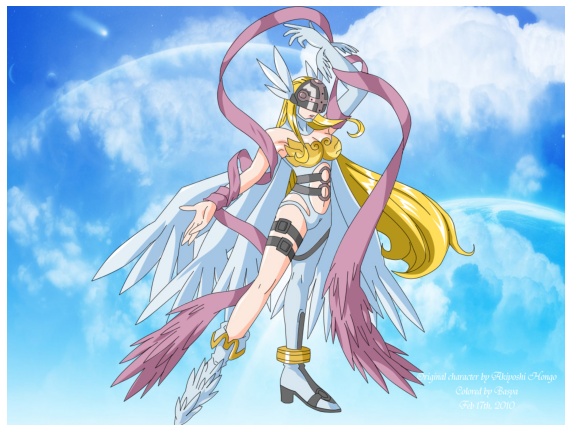

In [5]:
#show image asli
image = cv.imread('a.jpg')
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
plt.axis('off')

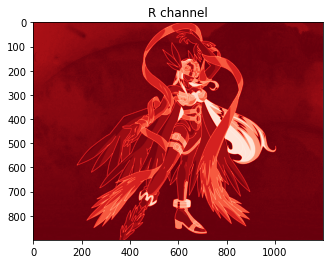

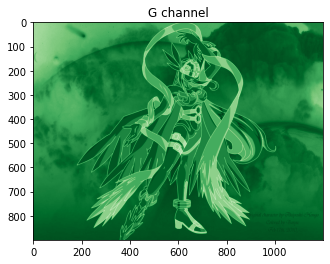

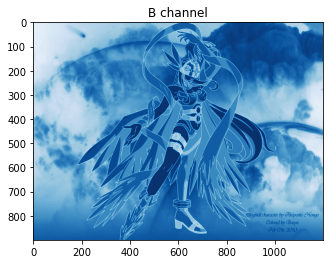

In [6]:
# extract channel
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

#show image
plt.title('R channel')
plt.imshow(red_channel, cmap="Reds")
plt.show()

plt.title('G channel')
plt.imshow(green_channel, cmap="Greens")
plt.show()

plt.title('B channel')
plt.imshow(blue_channel, cmap="Blues")
plt.show()

### Convert ke HSV

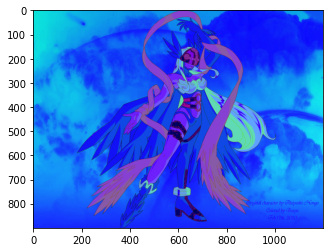

In [7]:
image = cv.imread('a.jpg')
hsv= np.copy(image)
hsv = cv.cvtColor(hsv, cv.COLOR_RGB2HSV)
plt.imshow(hsv)

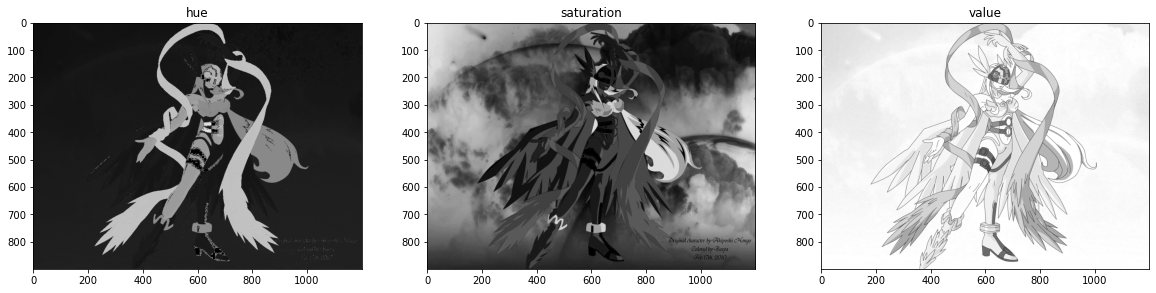

In [8]:
# extrak channel
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
fig,(ax1,ax2,ax3 )= plt.subplots(1,3,figsize = (20,10)) 

#show image
ax1.set_title ('hue')
ax1.imshow(h,cmap = "gray")

ax2.set_title ('saturation')
ax2.imshow(s,cmap = "gray")

ax3.set_title ('value')
ax3.imshow(v,cmap = "gray")

#Ploting each value 

In [30]:
# show koordinat piksel
filname='a.jpg'
im_c=cv.imread(filname,cv.COLOR_BGR2RGB)
def matriks_image(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(im_c,(x,y),50,(0,0,0),2)
        print(f'x={x} e y={y}')

In [31]:
def koordinat(im_c):
    # variabel fx dan fy
    fx=0.8
    fy=0.8
    cv.namedWindow('Images')
    cv.setMouseCallback('Images',matriks_image)
    # BGR to RGB
    im_c=cv.imread(filname,cv.COLOR_BGR2RGB)
    while True:
        #im_c = cv.resize(im_c,(640,640))
        newImg = cv.resize(im_c, (0,0), fx=fx, fy=fy)
        cv.imshow('Images',newImg)

        k=cv.waitKey(1) & 0xFF
        if k==27: # tekan esc untuk close
            cv.destroyAllWindows()
            break
            
# membaca gambar untuk memilih piksel
def images(filname):
    im_c=io.imread(filname)
    return im_c    
            

In [32]:
filname='a.jpg'
im_c=images(filname)
koordinat(im_c)

x=602 e y=400


In [24]:
lower_color = np.array([100, 100, 602])
upper_color = np.array([255, 400, 255]) 

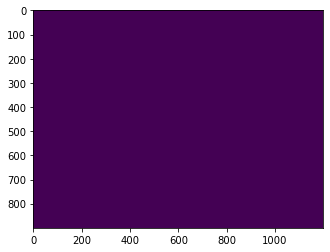

In [33]:
image = cv.imread('a.jpg')
mask_rgb = cv.inRange(image,lower_color,upper_color)
mask_image = np.copy(image)
plt.imshow(mask_rgb)

In [34]:
def koef(x,y,fx,fy,im):
    # memperhitungkan koefisien fx dan fy
    # dan mencari titik koordinatnya
    if im.shape[1]<round(x/fx):
        # tidak melampaui batas gambar asli dengan pembulatan
        a1=im.shape[1]-1
    else:
        a1=round(x/fx)
    if im.shape[0]<round(y/fy):
        a2=im.shape[0]-1
    else:
        a2=round(y/fy)
     # ekstraksi nilai RGB dengan gambar asli
    v=im[a2,a1]
    print(v)
    # menggunakan nilai RGB 640x640
    R=np.ones((640, 640))*v[0]
    G=np.ones((640, 640))*v[1]
    B=np.ones((640, 640))*v[2]
    total=[R,G,B]
    # 3 channel RGB
    total=np.stack(total,axis=2)
    total=total.astype('uint8')
    
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(total)
    # return koordinat gambar asli
    return a1, a2

[183 157 211]


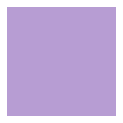

In [35]:
# data koordinat yang diskalakan ke 0,8 di x dan y dan nilai diperoleh
xR, yR = koef(602,400,0.8,0.8,image)

In [36]:
pixel_convert = rgb2hsv(image[yR,xR])
# H skala maksimum 360
# S dan V skala maksimum 255
p_hsv=[round(pixel_convert[0]*360),round(pixel_convert[1]*255),round(pixel_convert[2]*255)]
p_hsv

[269, 65, 211]

[45 37 54]
127 42 0 360 255 255
[127  42   0]
[360 255 255]


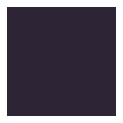

In [37]:
def nothing(x):
    pass

cv.namedWindow("Trackbars")

# Menentukan batas 
# Nilai maksimum
max_H=360
max_S=255
max_V=255
# Nilai minimum variabel-variabel ini tidak melampaui batas dalam nilai minimum rentangnya
image = cv.imread('a.jpg')
xR, yR = koef (584,481,0.8,0.8,image)
pixel_convert = rgb2hsv(image[yR,xR])
p_hsv=[round(pixel_convert[0]*360),round(pixel_convert[1]*255),round(pixel_convert[2]*255)]
p_hsv
min_H=p_hsv[0]+40
if min_H>360:
    min_H=360
min_S=p_hsv[1]+40
if min_S>100:
    min_S=255
min_V=p_hsv[2]+40
if min_V>100:
    min_V=255

# Modulasi / perubahan
cv.createTrackbar("L-H","Trackbars",0,min_H,nothing)
cv.createTrackbar("L-S","Trackbars",0,min_S,nothing)
cv.createTrackbar("L-V","Trackbars",0,min_V,nothing)
cv.createTrackbar("U-H","Trackbars",max_H,max_H,nothing)
cv.createTrackbar("U-S","Trackbars",max_S,max_S,nothing)
cv.createTrackbar("U-V","Trackbars",max_V,max_V,nothing)

# Hasil sementara interaktif dan akan diperbarui hingga tombol esc ditekan
# Kemudian batas akan ditampilkan
while True:
    hsv = cv.cvtColor(image.copy(), cv.COLOR_RGB2HSV)
    
    l_h= cv.getTrackbarPos("L-H","Trackbars")
    l_s= cv.getTrackbarPos("L-S","Trackbars")
    l_v= cv.getTrackbarPos("L-V","Trackbars")
    u_h= cv.getTrackbarPos("U-H","Trackbars")
    u_s= cv.getTrackbarPos("U-S","Trackbars")
    u_v= cv.getTrackbarPos("U-V","Trackbars")
    
    lower = np.array([l_h,l_s,l_v])
    upper = np.array([u_h,u_s,u_v])
    mask=cv.inRange(hsv,lower,upper)
    result=cv.bitwise_and(image,image,mask=mask)
    # Image kompres sebesar 45%
    fx=0.45
    fy=0.45
    newImg = cv.resize(image, (0,0), fx=fx, fy=fy)
    
    newMask = cv.resize(mask, (0,0), fx=fx, fy=fy)
    
    newresult = cv.resize(result, (0,0), fx=fx, fy=fy)
    
    cv.imshow("mask",newMask)
    cv.imshow("frame",newImg)
    cv.imshow("result",newresult)
    
    key=cv.waitKey(1)
    if key==27:
        print(l_h,l_s,l_v,u_h,u_s,u_v)
        print(lower)
        print(upper)
        break

cv.destroyAllWindows()